#1# Ân



In [69]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('Data/DataMTP.Fan.csv')
df = df.loc[:, ["post_id", "reactions"]]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_id    86 non-null     object
 1   reactions  43 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [71]:
df = df.dropna(how='any',axis=0) 
react_list = []
for react_str in df.reactions:
    react_dict = ast.literal_eval(react_str)
    react_list.append(react_dict)
df_reactions = pd.DataFrame(react_list)
df_reactions = pd.DataFrame(react_list)

In [72]:
df_reactions = df_reactions.fillna(0.0)
df_reactions = pd.concat([df_reactions, raw_df["shares"], raw_df["comments"], raw_df["reaction_count"],  raw_df["time"]], axis=1)

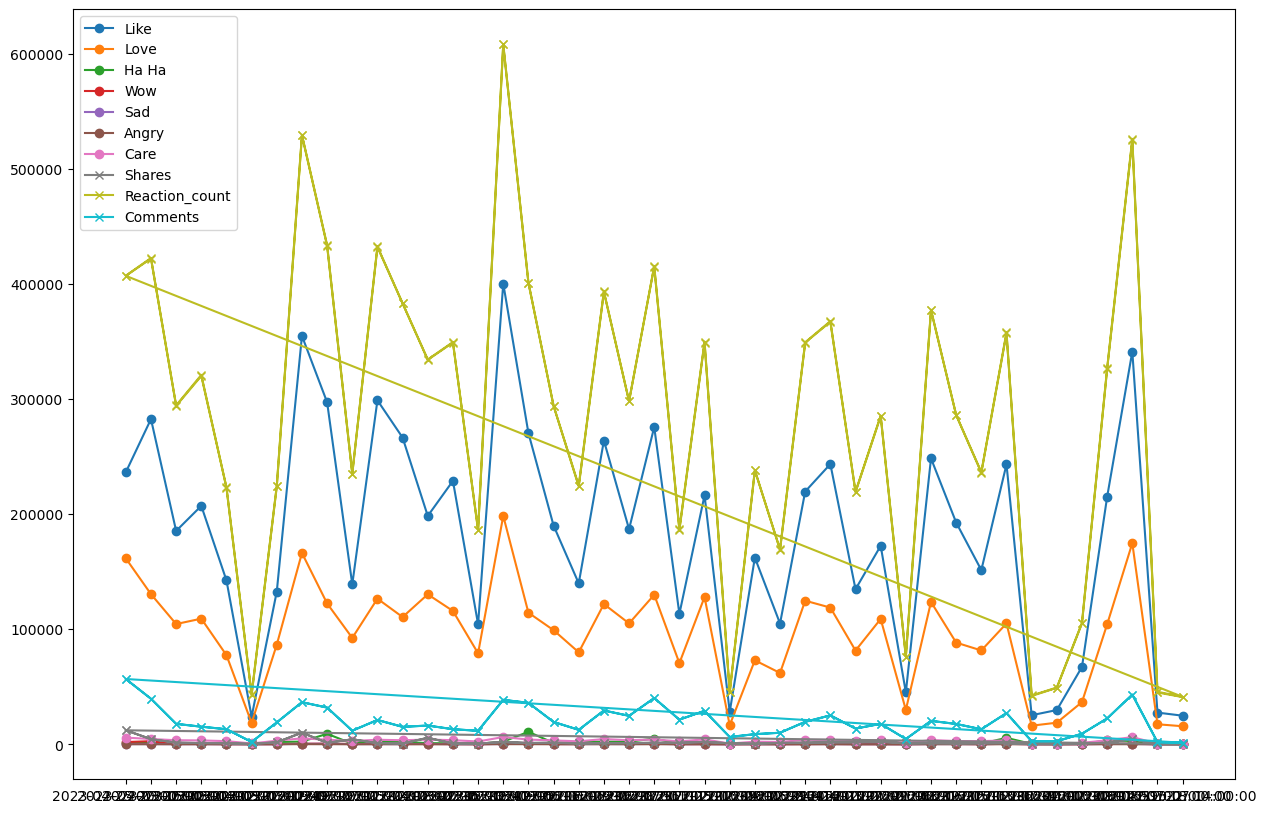

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_reactions['time'], df_reactions['like'], label = "Like", marker="o")
ax.plot(df_reactions['time'], df_reactions['love'], label = "Love", marker="o")
ax.plot(df_reactions['time'], df_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(df_reactions['time'], df_reactions['wow'], label = "Wow", marker="o")
ax.plot(df_reactions['time'], df_reactions['sad'], label = "Sad", marker="o")
ax.plot(df_reactions['time'], df_reactions['angry'], label = "Angry", marker="o")
ax.plot(df_reactions['time'], df_reactions['care'], label = "Care", marker="o")
ax.plot(df_reactions['time'], df_reactions['shares'], label = "Shares", marker="x")
ax.plot(df_reactions['time'], df_reactions['reaction_count'], label = "Reaction_count", marker="x")
ax.plot(df_reactions['time'], df_reactions['comments'], label = "Comments", marker="x")
plt.legend()


In [74]:
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   like            43 non-null     float64
 1   love            43 non-null     float64
 2   haha            43 non-null     float64
 3   wow             43 non-null     float64
 4   care            43 non-null     float64
 5   sad             43 non-null     float64
 6   angry           43 non-null     float64
 7   shares          86 non-null     int64  
 8   comments        86 non-null     int64  
 9   reaction_count  86 non-null     int64  
 10  time            86 non-null     object 
dtypes: float64(7), int64(3), object(1)
memory usage: 7.5+ KB


In [75]:
cor = df_reactions.corr()
cor

C:\Users\thanh\AppData\Local\Temp\ipykernel_20812\520101551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_reactions.corr()


,like,love,haha,wow,care,sad,angry,shares,comments,reaction_count
like,1.000000,0.952905,0.551849,0.460520,0.935692,0.641185,0.835326,0.411432,0.825321,0.995635
love,0.952905,1.000000,0.405791,0.476546,0.989722,0.543474,0.753564,0.553834,0.855656,0.976763
haha,0.551849,0.405791,1.000000,0.239624,0.415244,0.905804,0.581631,0.027911,0.548442,0.522202
wow,0.460520,0.476546,0.239624,1.000000,0.529407,0.299778,0.297159,0.590948,0.695064,0.473761
care,0.935692,0.989722,0.415244,0.529407,1.000000,0.544449,0.735515,0.575865,0.893549,0.962330
sad,0.641185,0.543474,0.905804,0.299778,0.544449,1.000000,0.718395,0.267721,0.619241,0.625976
angry,0.835326,0.753564,0.581631,0.297159,0.735515,0.718395,1.000000,0.420073,0.683233,0.819756
shares,0.411432,0.553834,0.027911,0.590948,0.575865,0.267721,0.420073,1.000000,0.633399,0.460678
comments,0.825321,0.855656,0.548442,0.695064,0.893549,0.619241,0.683233,0.633399,1.000000,0.847239
reaction_count,0.995635,0.976763,0.522202,0.473761,0.962330,0.625976,0.819756,0.460678,0.847239,1.000000


<Axes: >

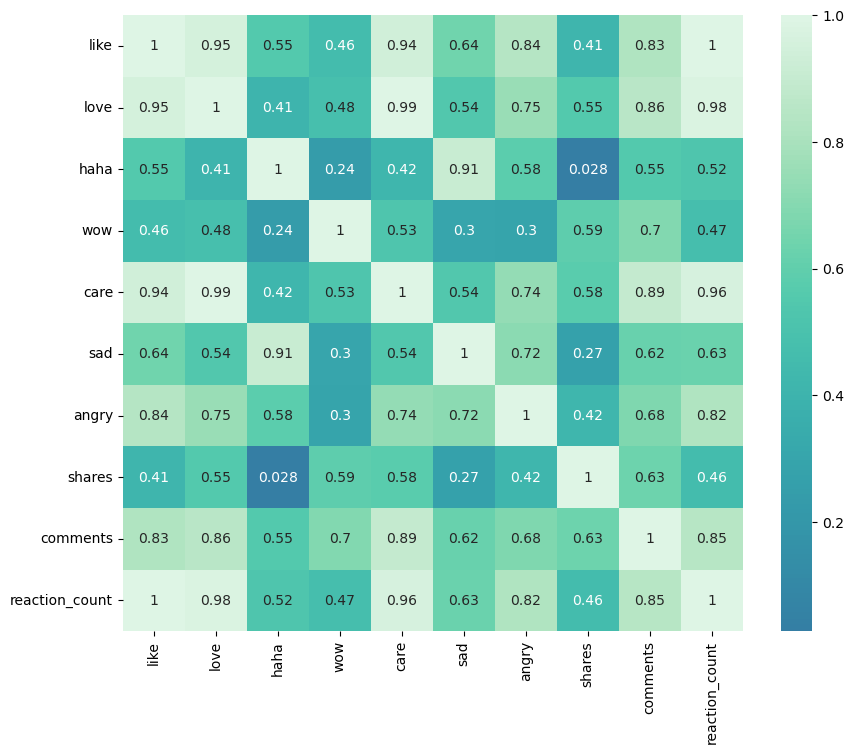

In [76]:
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.heatmap(data = cor, annot = True, cmap = 'mako', center = 0)

In [77]:
Max_reactions_count = raw_df[raw_df['reaction_count'] ==raw_df['reaction_count'].max()]
Max_reactions_count

,post_id,post_text,time,comments,comments_full,reaction_count,shares,reactions,ratio
15,pfbid034CL4pWTceqqwj6NvF2bsYbi7fdK3p6ZdKfSFz3f...,27 âm lịch !!!\n\n🕊,2023-01-18 19:05:00,38610,[],608186,2022,"{'like': 400299, 'love': 198441, 'haha': 2285,...",15.752033


In [78]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(raw_df['reaction_count'], raw_df['comments'])

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.8883457696644569
3.933400663471152e-30


In [79]:
import datetime
raw_df = pd.read_csv('Data/MTP.Fan.Data.csv')
raw_df.info()
raw_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         86 non-null     object
 1   post_text       86 non-null     object
 2   time            86 non-null     object
 3   comments        86 non-null     int64 
 4   comments_full   86 non-null     object
 5   reaction_count  86 non-null     int64 
 6   shares          86 non-null     int64 
 7   reactions       86 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.5+ KB


,post_id,post_text,time,comments,comments_full,reaction_count,shares,reactions
0,pfbid0365FumFYrvxgmKJGJzbvd9mmRQyb38GKVPf3pkYy...,MAKING MY WAY will be officially released at 0...,2023-04-25 20:00:00,56708,"[{'comment_id': '249904357418161', 'comment_ur...",407114,12157,"{'like': 236383, 'love': 161546, 'haha': 1250,..."
1,pfbid0GMYfP2ZYrSTGqcrCSkFyQTZm3nv3Cn26tdAviYYU...,…🤫,2023-04-23 20:00:00,39558,[],422493,4483,"{'like': 282536, 'love': 130450, 'haha': 1951,..."
2,pfbid0Ptc6oLei2WFwSWqY3tXhrfQgQSD6RMBKfZCzCKwb...,Quick stroll on Rodeo Drive 🍦✨😌,2023-03-15 20:00:00,17755,[],294460,1404,"{'like': 185372, 'love': 104468, 'haha': 763, ..."
3,pfbid038GGZxxJkdBDqPUXwVuERDEs2vaW6ZC567hXa71v...,"Finally, I’m here….\n🕊\nLos Angeles… Please tr...",2023-03-08 20:00:00,15291,[],320955,1046,"{'like': 207149, 'love': 109150, 'haha': 864, ..."
4,pfbid071RnaDhQGJ4VfFv6rCBpgFYvZcDrof6UzxmJjhLx...,Tràn ngập những cung bậc cảm xúc tuyệt vời bên...,2023-03-04 12:21:00,13079,[],223171,926,"{'like': 142382, 'love': 77426, 'haha': 439, '..."


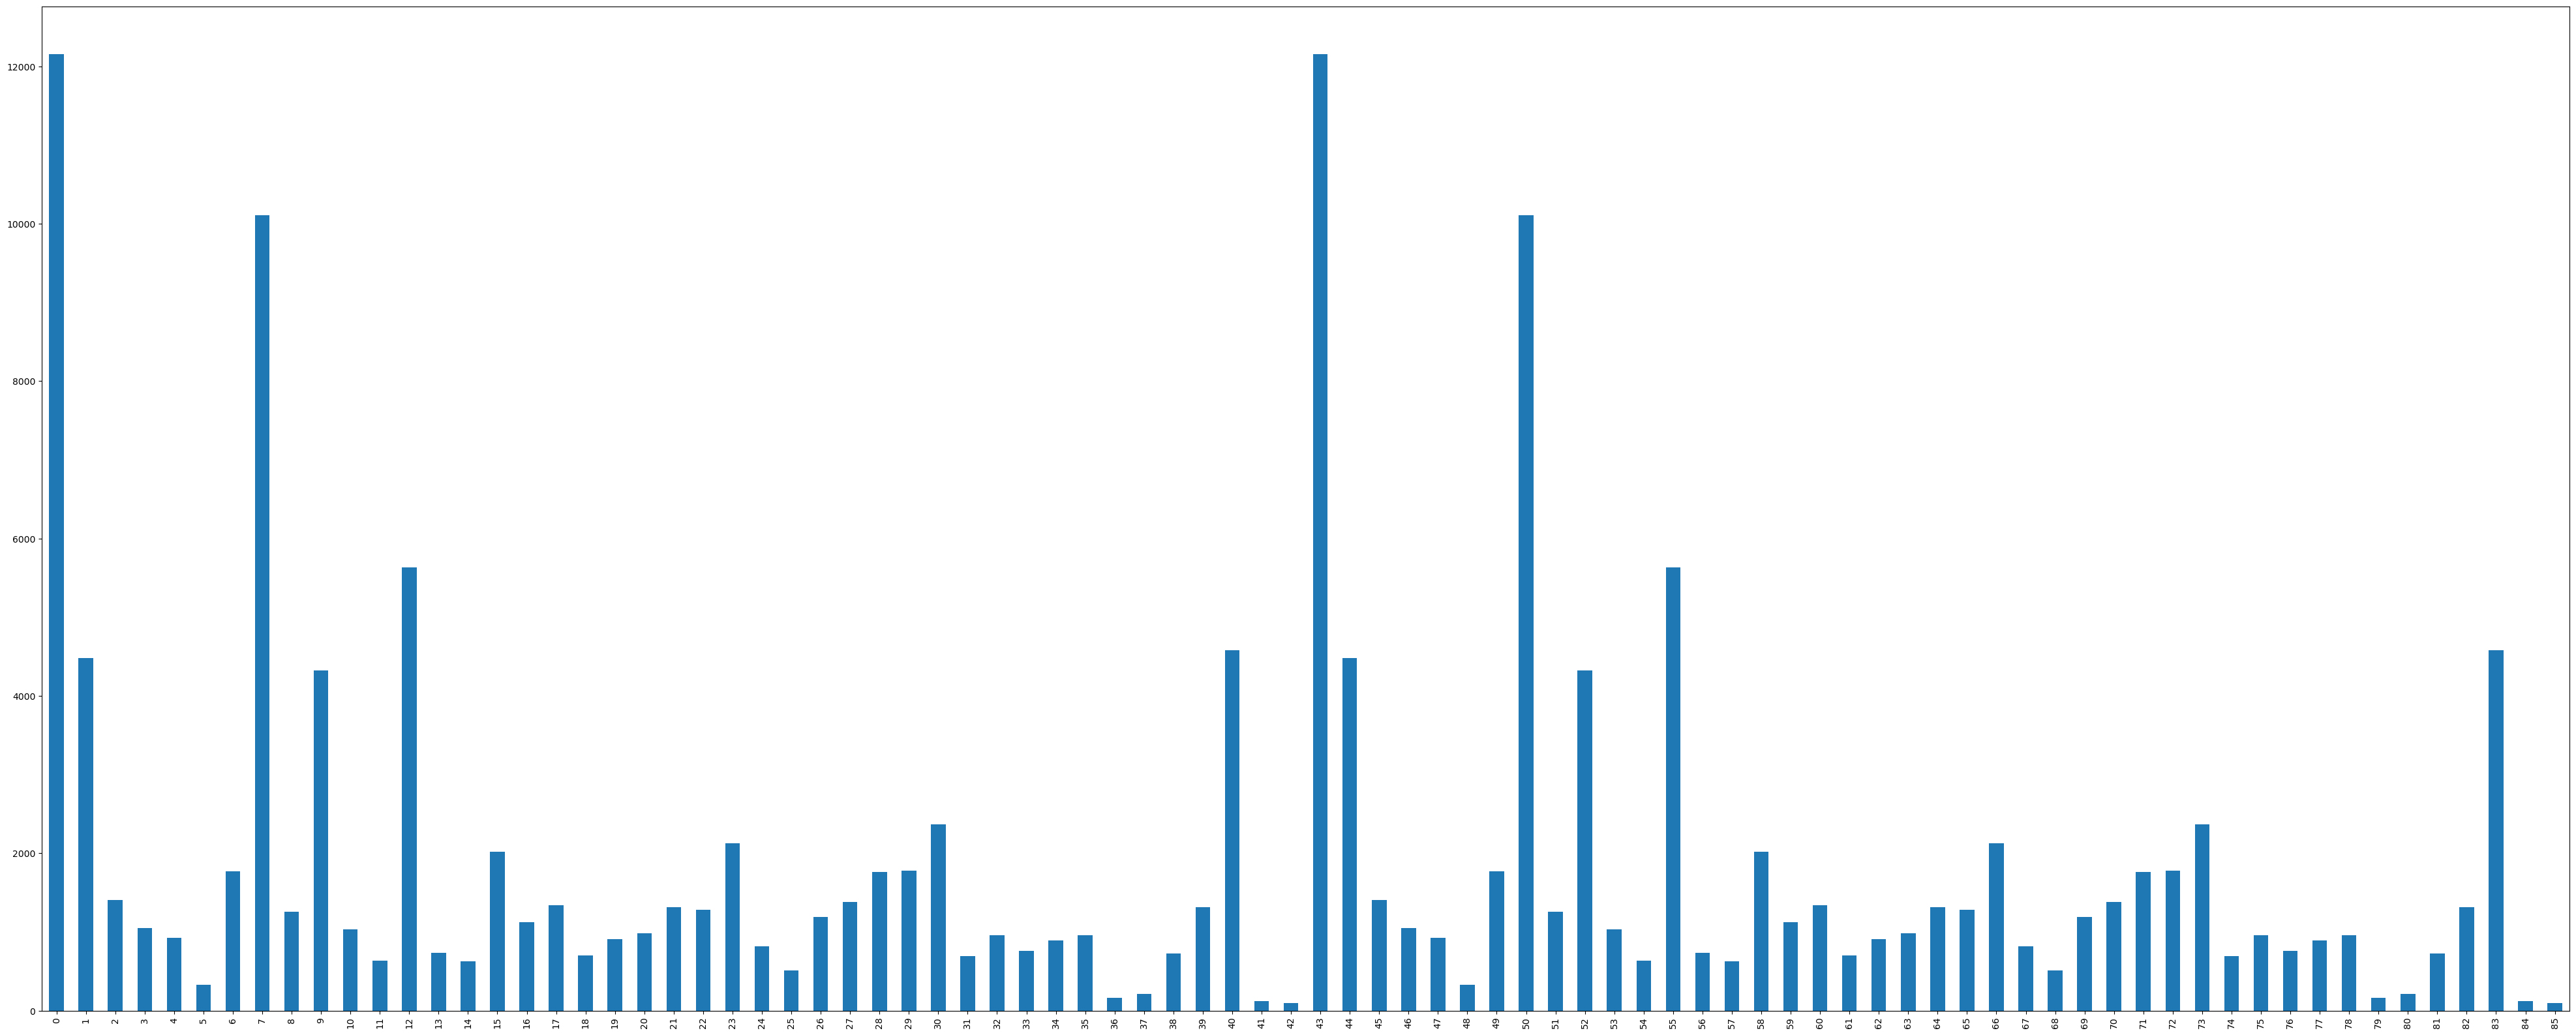

In [80]:
raw_df['shares'].plot(kind = "bar", x = "index", y = "shares", figsize = (50, 20));

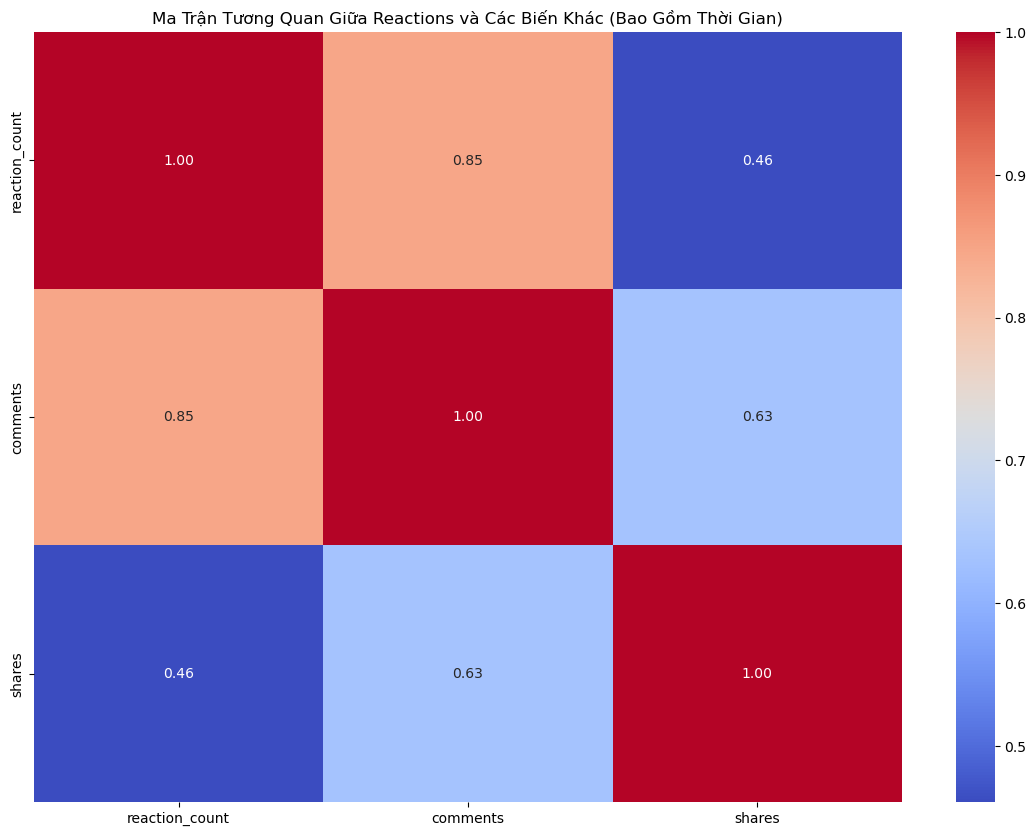

In [81]:
correlation_matrix = raw_df[['reaction_count', 'comments', 'shares']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma Trận Tương Quan Giữa Reactions và Các Biến Khác (Bao Gồm Thời Gian)')
plt.show()

In [82]:
feature_cols = ['reaction_count', 'comments']


X = raw_df[feature_cols].values

raw_df['ratio'] = raw_df['reaction_count']/raw_df['comments']

y = raw_df.reaction_count.values

In [83]:
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Let's check the shape of each of these:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(86, 2)
(86,)
(68, 2)
(18, 2)
(68,)
(18,)


In [84]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=30):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.num_iterations):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            print("Error: ",i, np.sum(y_pred - y) / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [85]:
# Let's instantiate our model:

model = LinearRegression()

# Now we'll fit our model to our training data:

model.fit(X_train, y_train)

# And finally, we'll use our model to make predictions on our test data:

y_pred = model.predict(X_test)

# Let's take a look at the predictions:

y_pred

Error:  0 -282497.1323529412
Error:  1 279550142104378.4
Error:  2 -2.766593296809716e+23
Error:  3 2.7379842377789103e+32
Error:  4 -2.7096710221731204e+41
Error:  5 2.681650590640724e+50
Error:  6 -2.653919915531466e+59
Error:  7 2.6264760005037396e+68
Error:  8 -2.599315880200807e+77
Error:  9 2.5724366199303767e+86
Error:  10 -2.5458353153475147e+95
Error:  11 2.519509092140818e+104
Error:  12 -2.493455105721847e+113
Error:  13 2.46767054091776e+122
Error:  14 -2.44215261166713e+131
Error:  15 2.416898560718909e+140
Error:  16 -2.391905659334498e+149
Error:  17 2.367171206992908e+158
Error:  18 -2.342692531098957e+167
Error:  19 2.3184669866945056e+176
Error:  20 -2.2944919561726486e+185
Error:  21 2.270764848994889e+194
Error:  22 -2.247283101411228e+203
Error:  23 2.2240441761831385e+212
Error:  24 -2.2010455623094215e+221
Error:  25 2.178284774754882e+230
Error:  26 -2.155759354181823e+239
Error:  27 2.1334668666843077e+248
Error:  28 -2.1114049035251709e+257
Error:  29 2.089571

array([-3.28692134e+274, -2.75641547e+275, -3.17033251e+275,
       -2.88107595e+275, -3.85356787e+275, -2.09300593e+275,
       -3.10404049e+274, -3.58273540e+274, -2.08501998e+275,
       -1.63800800e+275, -2.55204003e+275, -2.54868979e+275,
       -4.44840718e+275, -2.09224849e+275, -1.23611506e+275,
       -2.61431745e+275, -3.31069194e+274, -1.63224755e+275])

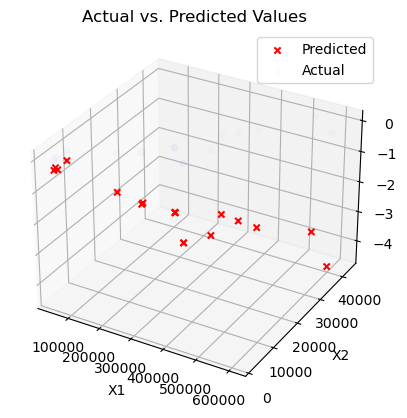

In [86]:
# Let plot two of our features against our target variable:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the predicted values
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Predicted', alpha=1)

# Scatter plot for the original data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='b', marker='o', label='Actual', alpha=0.01)


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [87]:
np.unique(y_pred)

array([-4.44840718e+275, -3.85356787e+275, -3.17033251e+275,
       -2.88107595e+275, -2.75641547e+275, -2.61431745e+275,
       -2.55204003e+275, -2.54868979e+275, -2.09300593e+275,
       -2.09224849e+275, -2.08501998e+275, -1.63800800e+275,
       -1.63224755e+275, -1.23611506e+275, -3.58273540e+274,
       -3.31069194e+274, -3.28692134e+274, -3.10404049e+274])

In [88]:
np.unique(y_test)

array([ 42430,  45000,  49000, 169000, 223171, 224000, 285000, 286000,
       286104, 349000, 349460, 357000, 377000, 393467, 433000, 525999,
       608000], dtype=int64)